In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [15]:
df = pd.read_csv("C:\\Users\\pc\\Downloads\\supermarket_sales - Sheet1.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

<Axes: >

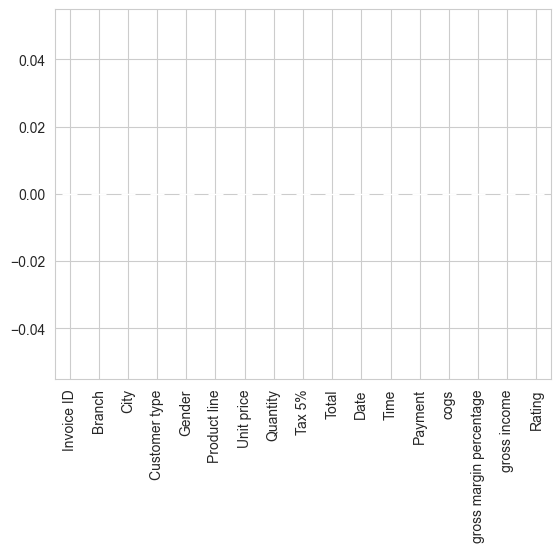

In [17]:
df.isna().sum().plot(kind = "bar")

We See Their is NO any Null Values in Our DataSet

In [18]:
df.duplicated().sum()

np.int64(0)

Also Their is No any duplicates in Our DataSet

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


In [20]:
df.describe(include="object").T

,count,unique,top,freq
Invoice ID,1000,1000,849-09-3807,1
Branch,1000,3,A,340
City,1000,3,Yangon,340
Customer type,1000,2,Member,501
Gender,1000,2,Female,501
Product line,1000,6,Fashion accessories,178
Date,1000,89,2/7/2019,20
Time,1000,506,19:48,7
Payment,1000,3,Ewallet,345


In [21]:
from datetime import date, datetime

Formating Our Date Column and Creating an Hour Column , Day , Month columns to Find the trends By Each 

In [22]:
df["Date"] = pd.to_datetime(df["Date"])
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M", errors="coerce")

df["Hour"] = df["Time"].dt.hour
df["day"] = df["Date"].dt.day_name()
df["Month"] = df["Date"].dt.month_name()
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,day,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13,Saturday,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,Friday,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13,Sunday,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20,Sunday,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10,Friday,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,1900-01-01 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,13,Tuesday,January
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,1900-01-01 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,17,Saturday,March
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,1900-01-01 13:22:00,Cash,31.84,4.761905,1.5920,7.7,13,Saturday,February
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,1900-01-01 15:33:00,Cash,65.82,4.761905,3.2910,4.1,15,Friday,February


Categorical Columns distribution 

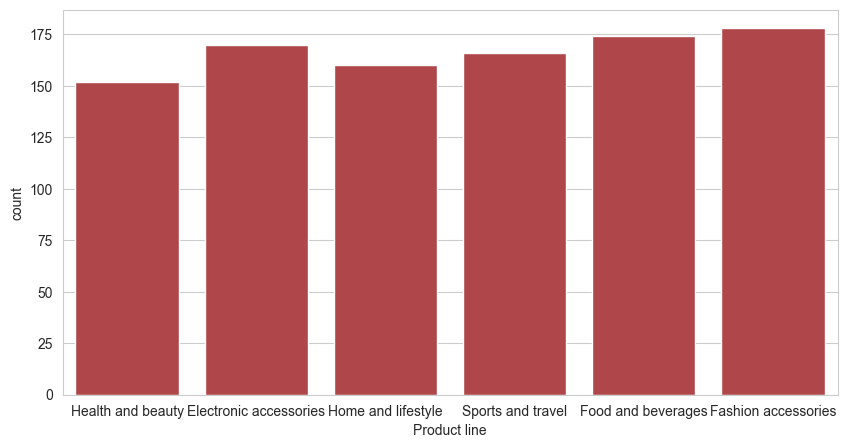

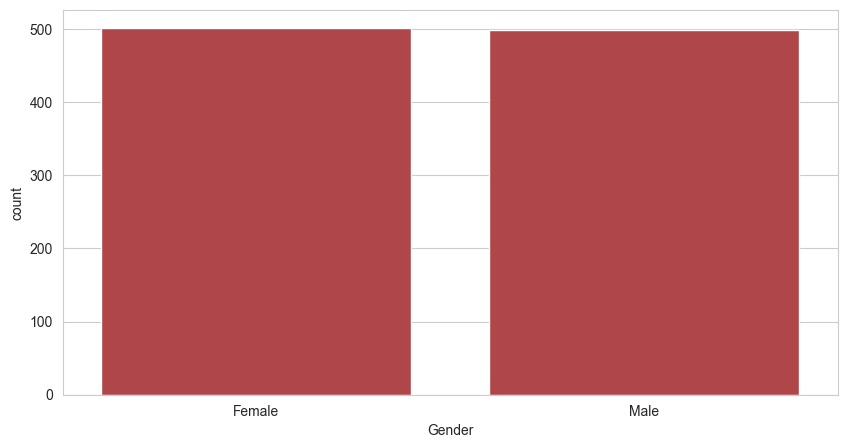

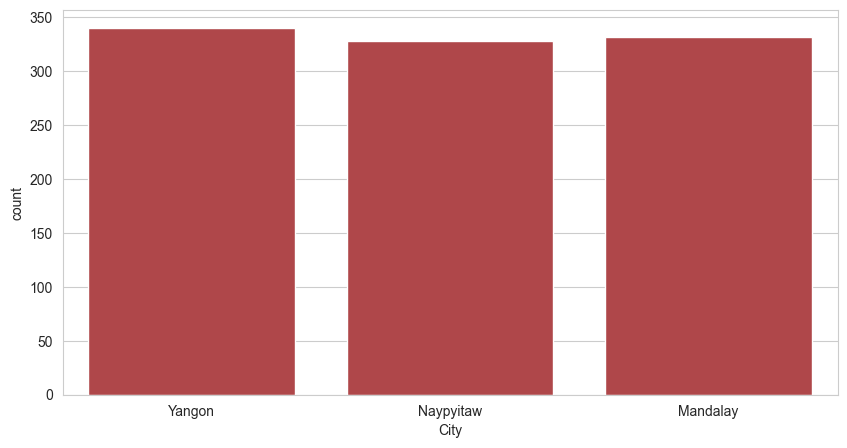

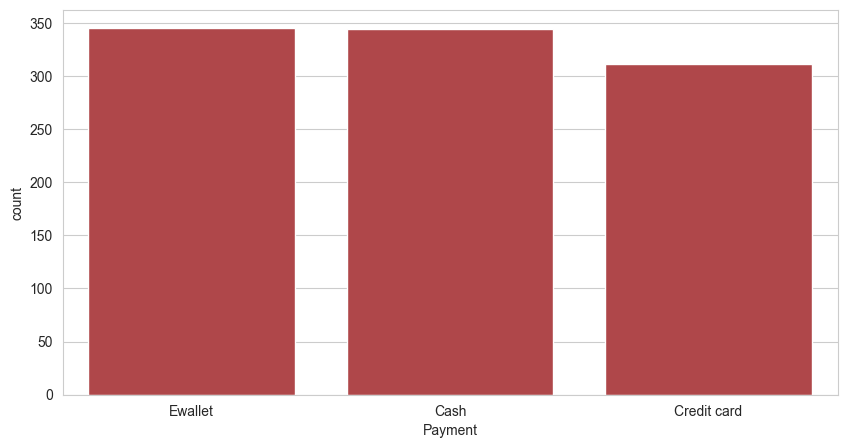

In [23]:
Cat_col = df[["Product line" , "Gender" , "City" , "Payment"]]
for col in Cat_col.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data = Cat_col , x = Cat_col[col])
    plt.show()

Gross Income by gender

C:\Users\pc\AppData\Local\Temp\ipykernel_20360\3594078420.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x="Gender", y="gross income", estimator=sum, ci=None)


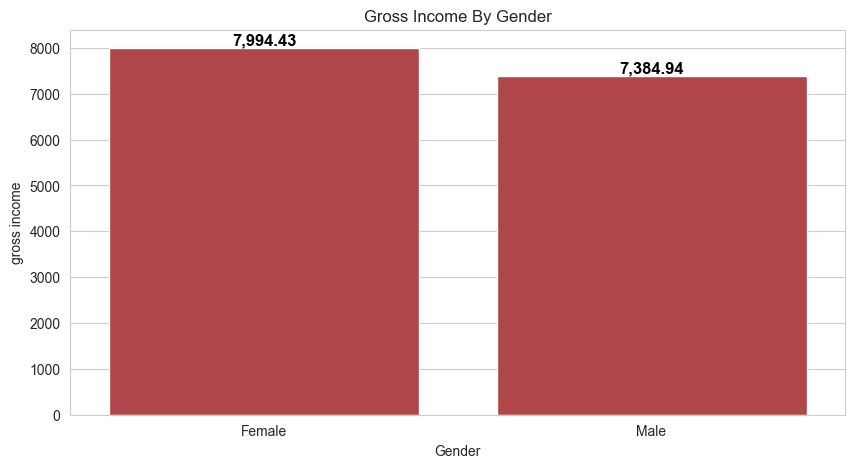

In [24]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df, x="Gender", y="gross income", estimator=sum, ci=None)


for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # X position: Center of the bar
        p.get_height(),  # Y position: Height of the bar
        f"{p.get_height():,.2f}",  # Format label (2 decimal places, comma separator)
        ha="center", va="bottom", fontsize=12, fontweight="bold", color="black"
    )

plt.title("Gross Income By Gender")
plt.show()

Female Customers: The total gross income for female customers is 7994.43.
Male Customers: The total gross income for male customers is 7384.94.
Difference: Female customers have a higher total gross income compared to male customers.

Cogs by Product Line


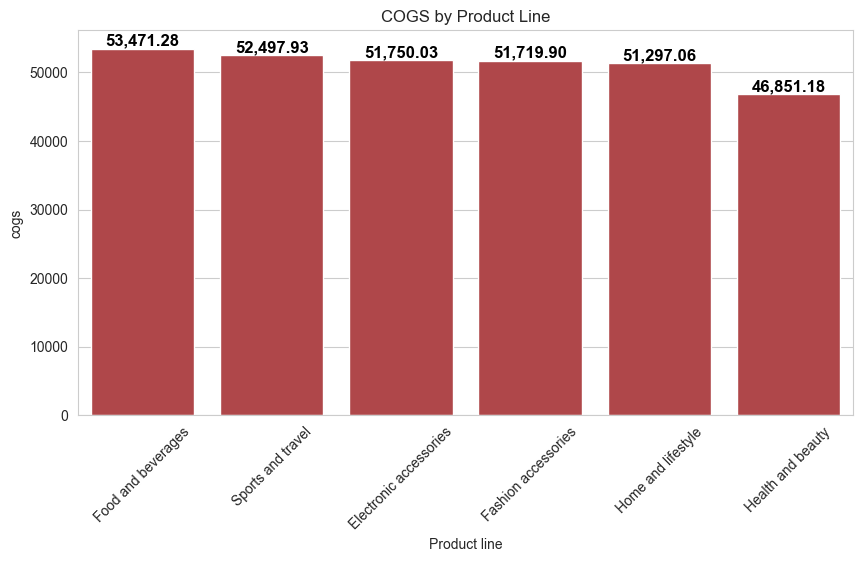

In [25]:
Product_cogs = df.groupby("Product line")["cogs"].sum().sort_values(ascending=False).reset_index()

# Create the bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=Product_cogs, x="Product line", y="cogs")

# Add text labels on each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # X position (center of the bar)
        p.get_height(),  # Y position (top of the bar)
        f"{p.get_height():,.2f}",  # Format number with comma and 2 decimal places
        ha="center", va="bottom", fontsize=12, fontweight="bold", color="black"
    )

# Formatting the plot
plt.title("COGS by Product Line")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

The analysis of the cost of goods sold (COGS) across various product lines reveals significant insights into the performance of each category. The product lines "Food and beverages," "Sports and travel," "Electronic accessories," "Fashion accessories," and "Home and lifestyle" all demonstrate strong COGS figures, ranging from approximately 51,000 to 53,500. This indicates a robust demand and sales performance in these categories.

In contrast, the "Health and beauty" product line shows a notably lower COGS of approximately 46,851.18, which is the lowest among all categories analyzed. This discrepancy suggests that while the health and beauty segment is still performing adequately, it may require strategic adjustments to enhance its sales performance. Overall, the data highlights the need for targeted marketing or product development efforts in the health and beauty sector to align its performance with the stronger categories.

Which hour has the most sales per day 

C:\Users\pc\AppData\Local\Temp\ipykernel_20360\2379644324.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


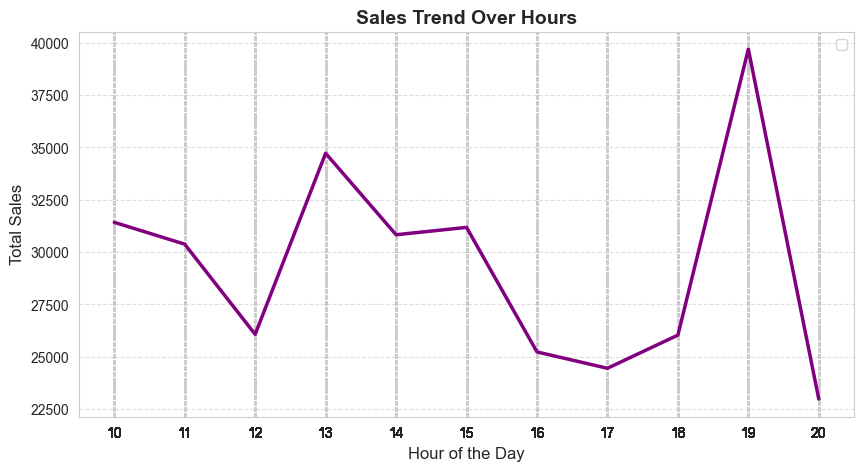

In [26]:
Revenue_by_hours =  df.groupby("Hour")["Total"].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data = Revenue_by_hours , x = "Hour" , y = "Total" , markers="o" , markersize = 10 , linewidth = 2.5 , color = "Purple")
plt.xticks(df["Hour"])  # Show every hour on x-axis
plt.title("Sales Trend Over Hours", fontsize=14, fontweight="bold")
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

Insights : We See the the most hour has sales is 7 pm  and the least hour has is 5 pm 


C:\Users\pc\AppData\Local\Temp\ipykernel_20360\1714203248.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


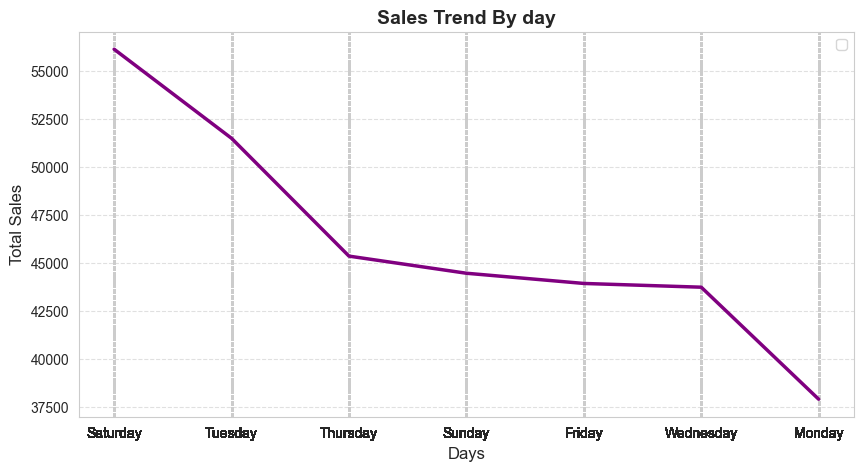

In [27]:
Sales_by_day = df.groupby("day")["Total"].sum().sort_values(ascending= False).reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data = Sales_by_day , x = "day" , y = "Total" , markers="o" , markersize = 10 , linewidth = 2.5 , color = "Purple")
plt.xticks(df["day"])  # Show every hour on x-axis
plt.title("Sales Trend By day", fontsize=14, fontweight="bold")
plt.xlabel("Days", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

Insights : The highest day with Sales is Saturday and the least One is Monday i Recommend More Offers On Monday so we can Raise the Sales

Average rating of Each Product line by Type of member 

C:\Users\pc\AppData\Local\Temp\ipykernel_20360\2873690855.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x="Product line", y="Rating", hue="Customer type", estimator=np.mean, ci=None)


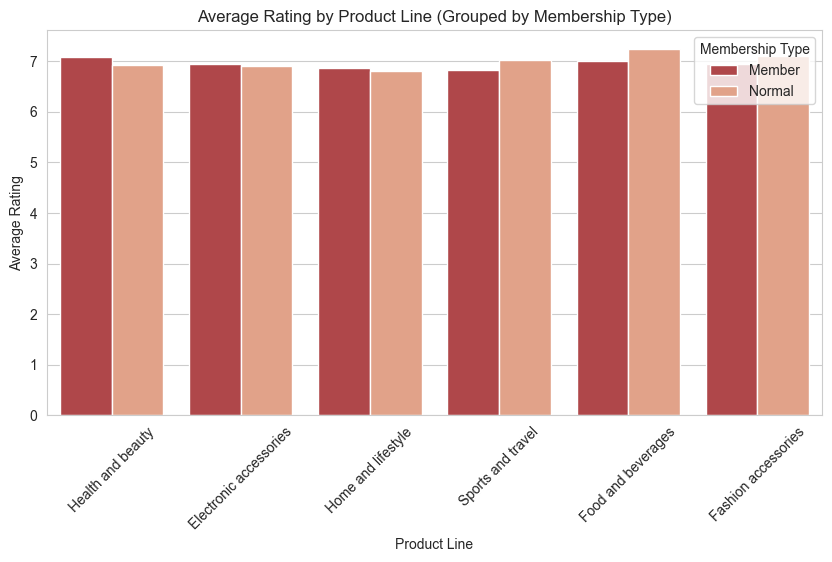

In [28]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df, x="Product line", y="Rating", hue="Customer type", estimator=np.mean, ci=None)


plt.title("Average Rating by Product Line (Grouped by Membership Type)")
plt.xlabel("Product Line")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)  
plt.legend(title="Membership Type", loc="upper right") 

Average Ratings by Product Line and Customer Type
Electronic Accessories: Members have an average rating of 6.95, while normal customers rate it slightly lower at 6.90.
Fashion Accessories: Members rate this product line at 6.95, whereas normal customers give a higher average rating of 7.11.
Food and Beverages: Members give an average rating of 7.00, and normal customers rate it at 7.25, the highest among all categories.
Health and Beauty: Members rate it at 7.08, while normal customers give a slightly lower rating of 6.93.
Home and Lifestyle: Members provide an average rating of 6.87, and normal customers rate it at 6.80, the lowest among all categories.
Sports and Travel: Members rate it at 6.82, while normal customers give a higher rating of 7.03.

Product line distribution by Gender 

<Axes: xlabel='Product line', ylabel='count'>

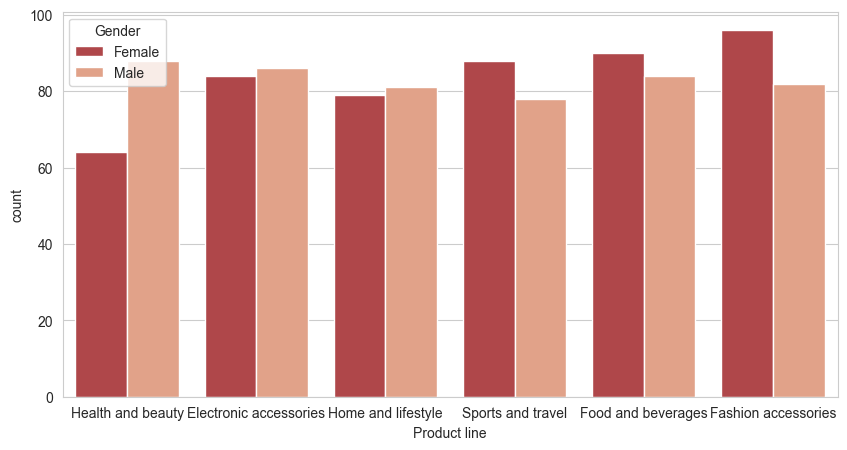

In [29]:
plt.figure(figsize=(10 ,5))
sns.countplot(data = df , x = df["Product line"] , hue = df["Gender"])

We Find that Male Buys more in Health and beauty , Electronic accesories , Home and lifestyle
And Female buys more in Sport and travel , Food and beverages and Fashion Accesories

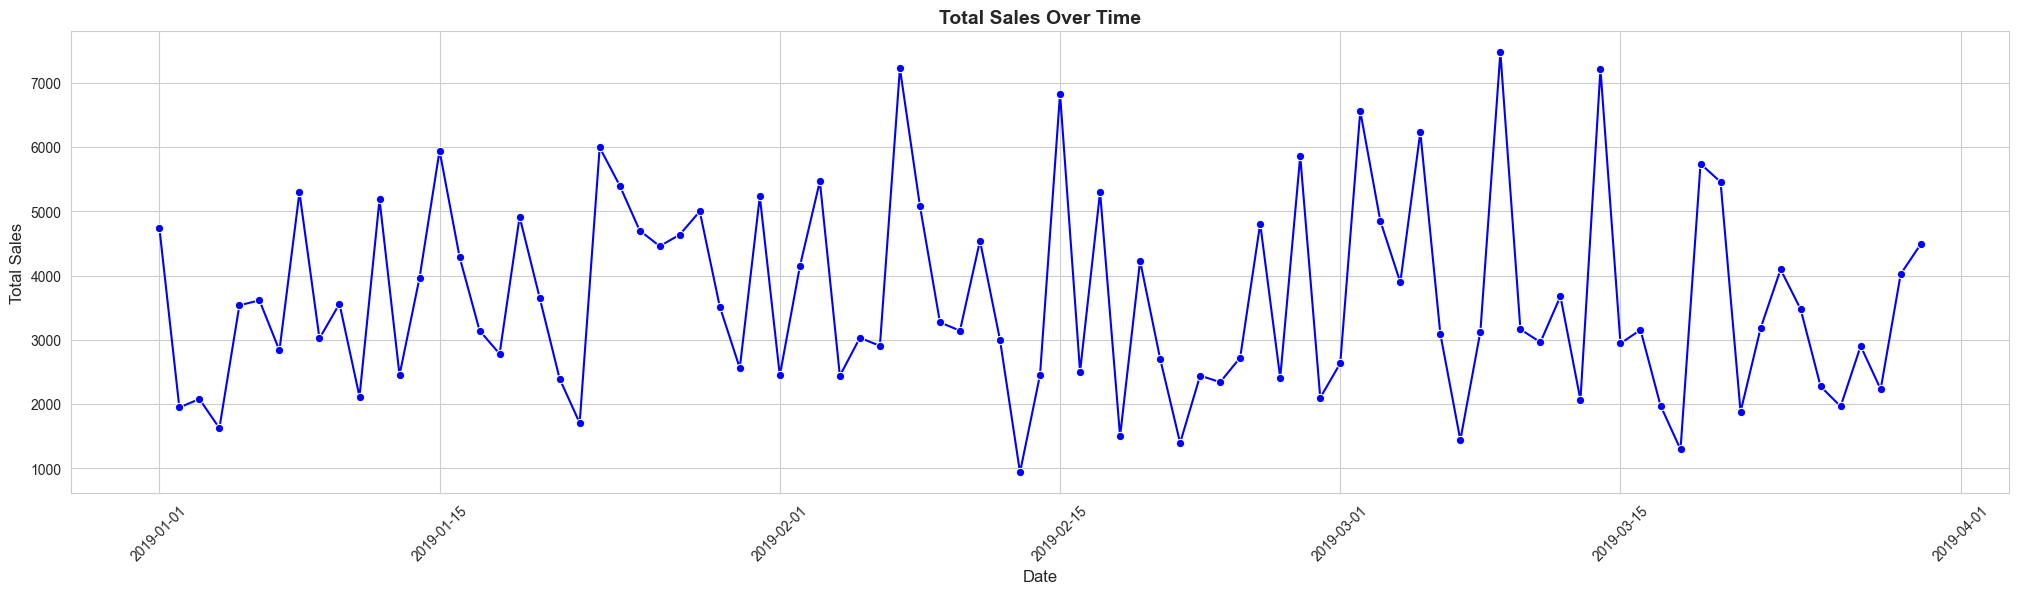

In [30]:
sales_over_time = df.groupby("Date")["Total"].sum().reset_index()

# Plot
plt.figure(figsize=(25, 6))
sns.lineplot(data=sales_over_time, x="Date", y="Total", marker="o", color="b")

# Formatting
plt.title("Total Sales Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()

<Axes: xlabel='Month', ylabel='Total'>

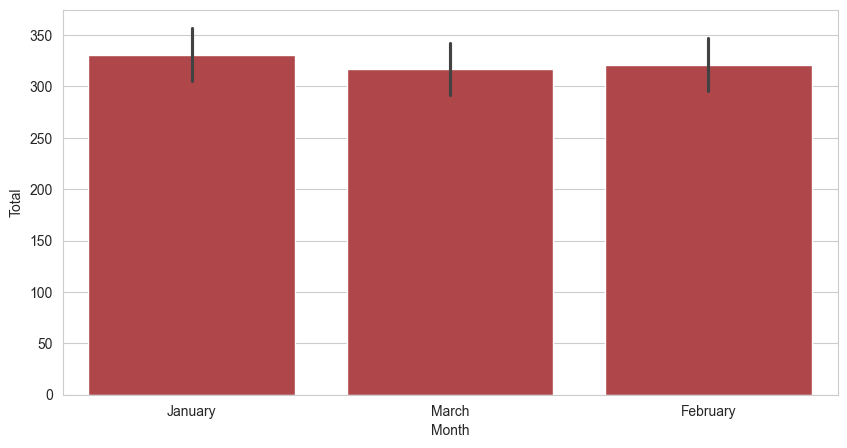

In [ ]:

plt.figure(figsize=(10,5))
sns.barplot(data = df , x = df["Month"] , y =df["Total"])

We Find that the highest Month of Sales is January then Feburary then March 